In [2]:
import pandas as pd

READING THE DATA FROM 2014  TO 2018

In [3]:
features = pd.read_excel('C:/Users/User/Downloads/Sales & Qty Sold Daily Data.xlsx')
features.head(5)

,BRANCH_CODE,Date - Year,Date - Month,Date - Day,Total Ret Sales,Qty Sold Retoff
0,ALM,2018,April,27,5690.47,4.0
1,ALM,2018,April,29,1333.33,2.0
2,ALM,2018,April,30,666.66,2.0
3,ALM,2018,May,1,809.52,1.0
4,ALM,2018,May,6,14952.39,6.0


MERGING DAY, MONTH, YEAR COLUMNS INTO DATE COLUMN

In [4]:
features['Date']=pd.to_datetime(features['Date - Month']+features['Date - Year'].astype(str)+features['Date - Day'].astype(str),format='%B%Y%d')

ONLY SELECTING THE DATA FROM MOE BRANCH 

In [5]:
features=features[features["BRANCH_CODE"].isin(["MOE"])]

CREATING A DATA RANGE FROM 2014 TO 2018

In [6]:
df_A=pd.date_range(start='2014-01-01', end='2018-12-31')
df_date=pd.DataFrame(df_A)
df_date.columns=["Date"]
df_date

features=df_date.merge(features, how='left', on='Date').ffill(0)

C:\Users\User\AppData\Local\Temp/ipykernel_8144/2689725883.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.ffill will be keyword-only.
  features=df_date.merge(features, how='left', on='Date').ffill(0)


CONVERTING THE COLUMNS HAVING DATE INTO DATE TIME 

In [7]:
features['Date - Month']=pd.to_datetime(features['Date - Month'],format="%B")

In [8]:
features['Date - Month']=features['Date - Month'].dt.strftime('%m')

In [9]:
features['Date - Month']=features['Date - Month'].astype(int)

In [10]:
features.describe()

,Date - Year,Date - Month,Date - Day,Total Ret Sales,Qty Sold Retoff
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,2016.000000,6.522453,15.742059,34212.716627,5.247738
std,1.414214,3.450279,8.801479,48284.211168,3.667523
min,2014.000000,1.000000,1.000000,-12050.000000,-2.000000
25%,2015.000000,4.000000,8.000000,10231.250000,3.000000
50%,2016.000000,7.000000,16.000000,22156.670000,4.450000
75%,2017.000000,10.000000,23.000000,43000.000000,7.000000
max,2018.000000,12.000000,31.000000,909490.000000,32.700000


ASSIGNING THE YEAR TO NUMBERS 

In [11]:
features['Date - Year'] = features['Date - Year'].replace([2014,2015,2016,2017,2018],[1,2,3,4,5,])

DROPING THE SALES COLUMN

In [12]:
features=features.drop(['Total Ret Sales'], axis=1)
features=features.drop(['Date'], axis=1)

CHANGE THE DATA TYPE FROM OBJECT INTO INT

In [13]:
features["Qty Sold Retoff"]=features["Qty Sold Retoff"].astype(int)

In [14]:
features["Date - Day"]=features["Date - Day"].astype(int)
features["Date - Year"]=features["Date - Year"].astype(int)

CREATING DUMMIES 

In [15]:
features = pd.get_dummies(features)
features.head()

,Date - Year,Date - Month,Date - Day,Qty Sold Retoff,BRANCH_CODE_MOE
0,1,1,1,2,1
1,1,1,2,2,1
2,1,1,3,6,1
3,1,1,4,6,1
4,1,1,5,1,1


WE ARE SEPARATING THE DATA INTO TWO, THE TRAINING SET FROM 2014 TO 2017 AND THE FOR TESTING WE TAKE THE DATA FOR YEAR 2018

In [16]:
features2=features[features["Date - Year"]==5]
features=features[features["Date - Year"].isin([1,2,3,4])]

REMOVING THE SALES QTY VALUES AND CONVERTING THE DATA INTO AN ARRAY

In [17]:
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['Qty Sold Retoff'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Qty Sold Retoff', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

SPLITING TRAIN AND TEST

In [18]:
from sklearn.model_selection import train_test_split

In [1]:
pwd

'C:\\Users\\User\\DASH'

In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,random_state = 42)

In [20]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1095, 4)
Training Labels Shape: (1095,)
Testing Features Shape: (366, 4)
Testing Labels Shape: (366,)


FITTING THE MODEL 

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

PREDICTING THE MODEL

In [22]:
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.85


In [23]:
labels1 = np.array(features2['Qty Sold Retoff'])

# Remove the labels from the features
# axis 1 refers to the columns
features2= features2.drop('Qty Sold Retoff', axis = 1)

# Saving feature names for later use
feature_list2 = list(features2.columns)

# Convert to numpy array
features2 = np.array(features2)

PRREDICTING THE 2018 YEAR UNSEEN DATE SALES

In [24]:
predictions1 = rf.predict(features2)

CONVERT THE ARRAY TO A DATAFRAME

In [25]:
import datetime

# Dates of training values
months = features2[:, feature_list2.index('Date - Month')]
days = features2[:, feature_list2.index('Date - Year')]
years = features2[:, feature_list2.index('Date - Day')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

dates=pd.DataFrame(dates)
dates=dates[0].str.split('-', expand=True)
dates[2]=dates[2].astype(int)
dates[2]=dates[2].replace([1,2,3,4,5],[2014,2015,2016,2017,2018,])
dates[2]=dates[2].astype(str)
dates= dates[0]+"-"+dates[1]+"-"+dates[2]

dates = [datetime.datetime.strptime(date, '%d-%m-%Y') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'qty sales': labels1})

# Dates of predictions
months = features2[:, feature_list.index('Date - Month')]
days = features2[:, feature_list.index('Date - Day')]
years = features2[:, feature_list.index('Date - Year')]

# Column of dates
test_dates = [ str(int(day))+ '-' + str(int(month)) + '-' + str(int(year)) for year, month, day in zip(years, months, days)]

test_dates=pd.DataFrame(test_dates)
test_dates[0].astype(str)
test_dates=test_dates[0].str.split('-', expand=True)
test_dates[2]=test_dates[2].astype(int)
test_dates[2]=test_dates[2].replace([1,2,3,4,5],[2014,2015,2016,2017,2018,])
test_dates[2]=test_dates[2].astype(str)
test_dates= test_dates[0]+"-"+test_dates[1]+"-"+test_dates[2]


test_dates = [datetime.datetime.strptime(date, '%d-%m-%Y') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': dates , 'prediction': predictions1}) 

In [26]:
true_data.sort_values(by='date')

,date,qty sales
0,2018-01-01,5
1,2018-01-02,6
2,2018-01-03,2
3,2018-01-04,1
4,2018-01-05,8
...,...,...
360,2018-12-27,4
361,2018-12-28,5
362,2018-12-29,4
363,2018-12-30,4


In [27]:
predictions_data.sort_values(by='date')

,date,prediction
0,2018-01-01,9.663
1,2018-01-02,10.137
2,2018-01-03,6.747
3,2018-01-04,6.569
4,2018-01-05,9.189
...,...,...
360,2018-12-27,5.012
361,2018-12-28,5.431
362,2018-12-29,7.072
363,2018-12-30,8.525


MERGING BOTH TRUE VALUE AND PREDICTIED VALUE

In [28]:
df = true_data.merge(predictions_data, how='left', on = 'date')

DROPPING THE NAN VALUES

In [29]:
df2=df.dropna()

In [31]:
df3 = df2.set_index(pd.to_datetime(df2['date']))
df3=df3.drop(['date'], axis=1)

CHECKING THE MEAN  ABSOLUTE ERROR

In [33]:
mae=np.abs((df2["prediction"]-df2["qty sales"]))

In [34]:
mae=mae.mean()
round(mae, 3)

3.024

PLOTTING 

In [35]:
df1=df2[["date","qty sales","prediction"]]

In [36]:
df1 = df1.set_index(pd.to_datetime(df1['date']))

<AxesSubplot:xlabel='date'>

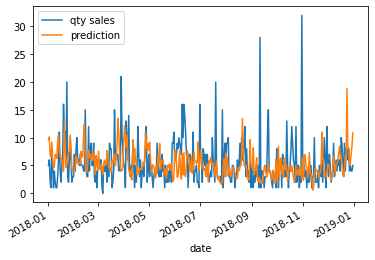

In [37]:
df3.plot()

COMPARING THE SALES VS PREDICTED SALES 

In [38]:
df1

,date,qty sales,prediction
date,,,
2018-01-01,2018-01-01,5,9.663
2018-01-02,2018-01-02,6,10.137
2018-01-03,2018-01-03,2,6.747
2018-01-04,2018-01-04,1,6.569
2018-01-05,2018-01-05,8,9.189
...,...,...,...
2018-12-27,2018-12-27,4,5.012
2018-12-28,2018-12-28,5,5.431
2018-12-29,2018-12-29,4,7.072
